In [1]:
import gym
import robo_gym
from robo_gym.wrappers.exception_handling import ExceptionHandling

import numpy as np

In [2]:
target_machine_ip = 'localhost' # or other machine 'xxx.xxx.xxx.xxx'

# initialize environment
env = gym.make('CubeRoomOnNavigationStack-v0', ip=target_machine_ip, gui=True)
env = ExceptionHandling(env)

env.reset(**{'new_room': True, 'new_agent_pose': True})

Starting new Robot Server | Tentative 1
Successfully started Robot Server at localhost:51875


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


{'occupancy_grid': array([-1, -1, -1, ..., -1, -1, -1], dtype=int16),
 'agent_pose': array([0., 0., 0.])}

In [3]:
state = env.reset(**{'new_room': False, 'new_agent_pose': True})
state

{'occupancy_grid': array([-1, -1, -1, ..., -1, -1, -1], dtype=int16),
 'agent_pose': array([0., 0., 0.])}

In [3]:
env.agent_pose

array([ 1.60306001,  0.92787546, -2.25135589])

In [95]:
env.action_space.low, env.action_space.high

(array([ 0., -1., -1.], dtype=float32), array([1., 1., 1.], dtype=float32))

In [96]:
pose_low = env.observation_space['agent_pose'].low
pose_high = env.observation_space['agent_pose'].high
print(f"observation[agent_pose]: \n\tlow: {pose_low}\n\thigh: {pose_high}:")

observation[agent_pose]: 
	low: [ 0.        -3.1415927 -3.1415927]
	high: [      inf 3.1415927 3.1415927]:


In [6]:
action = [0.1,0,0]
state, _, _, _ = env.step(action)
print(state['agent_pose'], env.agent_pose)

[ 0.04982662  2.35518585 -0.01492357] (1.6526182889938354, 0.933039665222168, -2.266279458999634)


{-1: 62385, 0: 2823, 100: 328}
{0: 328, 128: 62385, 255: 2823}


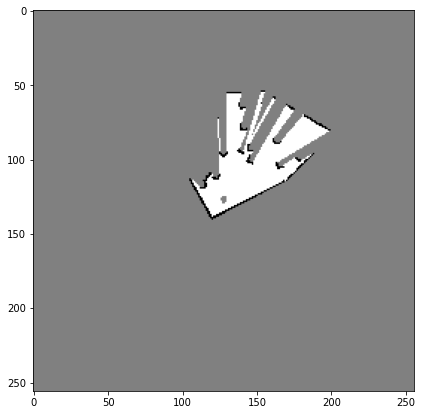

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 7,7

o = np.array(state['occupancy_grid'], dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

o[o == 0] = 255
o[o == 100] = 0
o[o == -1] = 128
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))
img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 

(128, 128)


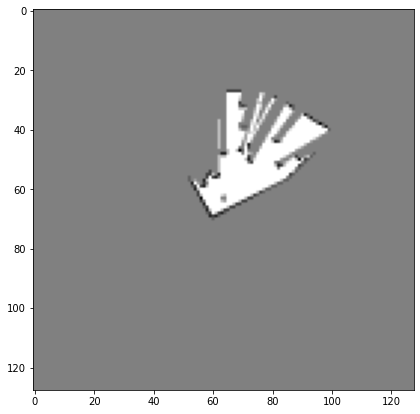

In [12]:
from skimage.transform import resize, rescale

resized = rescale(img, 0.5, anti_aliasing=False)
print(resized.shape)
plt.imshow(resized, cmap='gray')

{0: 60600, 255: 4936}


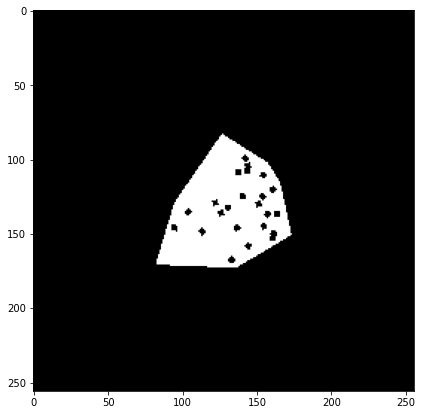

In [13]:
o = np.array(env.map_trueth, dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 